In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import random  # Used for random number generation. 

import scipy.special  # Used for factorial calculations. 
import scipy.stats  # Used for distributions. 

## Ilustrate the Law of Large Numbers (LLN)  [Called "De relative frekvensernas stabilitet" in the book p.14]
1. Simulate 10000 dice throws. 
2. Plot the relative frequency of the number of times three dots occur for 1, 2, ..., 10000 throws.
3. To what number does the relative frequency converge to? What is the probability of getting three dots when throwing a dice? Do these two numbers coincide?
4. Explain what you observe. 

Make sure to create a good pedagogical plot, i.e. include title, x-label and y-label. 

**Hint: For step 1 use the random.choices() function. You should also create an empty list that you append with the relative frequencies for 1, 2, ... 10000 throws.**

In [3]:
def rel_freq(samples, utfall, event):
    """samples = num of samples
       utfall = possible outcomes in LIST format
       event = the number(s) we are looking for in LIST format"""
    samps = random.choices(utfall, k = samples)
    num_of_success = 0
    y = []
    x = []
    for i, n in enumerate(samps, start=1):
        if n in event:
            num_of_success += 1
        y.append(num_of_success/i)
        x.append(i)
    
    fig, ax = plt.subplots(figsize = (15,4))
    ax.plot(x, y)
    ax.hlines(y=len(event)/len(utfall), xmin = 0, xmax = len(x), color = 'red', label = f'Probability: {round(len(event)/len(utfall), 4)}' )
    ax.set_xlabel('Antal försök')
    ax.set_ylabel('Relativ frekvens')
    ax.set_title(f'Relativ frekvens för att få {event} efter {samples} kast')
    ax.legend()

# 1, 2:

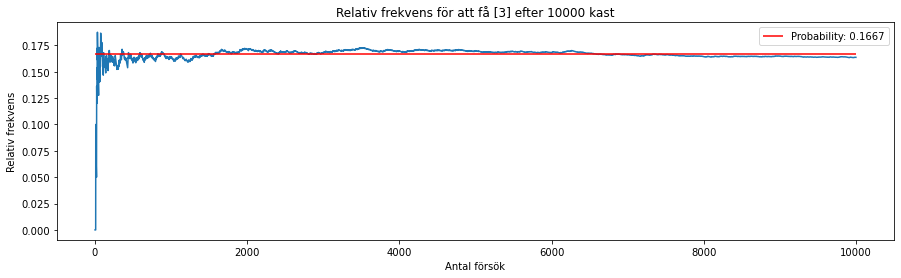

In [12]:
y = rel_freq(10000, list(range(1,7)), [3])

# 3, 4:

**To what number does the relative frequency converge to?**

The relative frequency converges to the theoretical probability we can calculate with the classical probability formula: advantageous events divided by all events. Here this means 1/6.

**What is the probability of getting three dots when throwing a dice? Do these two numbers coincide?**

The probability for getting a 3 in a dice throw is 1/6.
The relative frequency and the probability conicides after a large enough sample size.
The relative frequency and the probability would match perfectly with infinite number of samples.

# Solve exercise 105 in the book. 

# a.

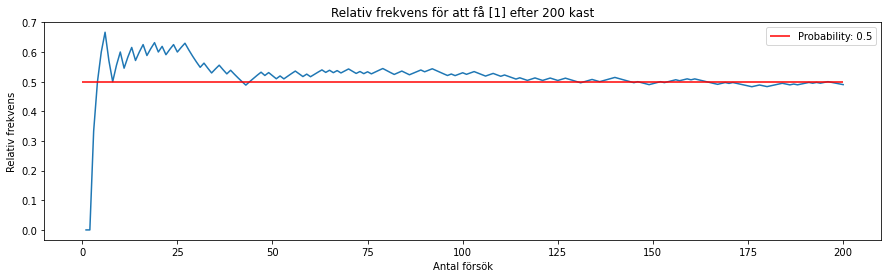

In [6]:
y2 = rel_freq(200, [0, 1], [1])

# b.

The relative freqkency is unstable in the beginning, because of the small size of the sample, but as we expand our sample size the frequency stabilizes around the probability, thanks to the high number of samples.

# Calculate 1!, 2!, ..., 12! . What is your conclusion regarding the growth of the factorial function?

In [2]:
# index
y = [scipy.special.factorial(n) for n in range(1, 13)]
x = list(range(1, 13))
list(zip(x, y))

[(1, 1.0),
 (2, 2.0),
 (3, 6.0),
 (4, 24.0),
 (5, 120.0),
 (6, 720.0),
 (7, 5040.0),
 (8, 40320.0),
 (9, 362880.0),
 (10, 3628800.0),
 (11, 39916800.0),
 (12, 479001600.0)]

Factorial function shoots out extremely rapidly with each consecutive number.

Fun fact: a deck of cards can be dealt 52! different ways / permutations. That is somewhat "close" to the number of atoms in the whole Milky Way.

Text(0.5, 1.0, 'Numbers and their corresponding factorials')

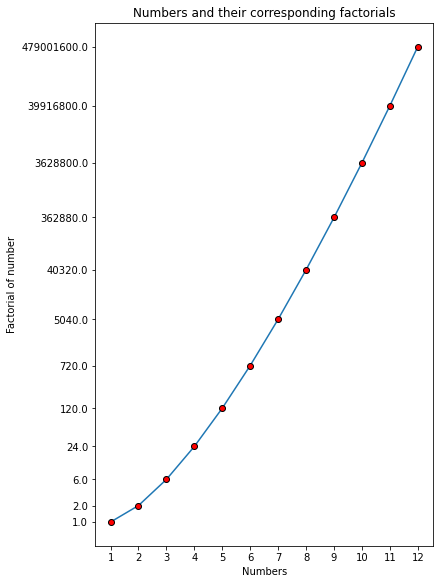

In [18]:
fig, ax = plt.subplots(figsize=(6,8), layout='constrained')
ax.plot(x,y, marker='o', mec='black', mfc='red')
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_yticklabels(y)
ax.set_xlabel('Numbers')
ax.set_ylabel('Factorial of number')
ax.set_title('Numbers and their corresponding factorials')

# We know that the binomial coefficients can be used to calculate the number of ways to choose k elements from n without replacement when the order does not matter. We have the formula: $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ .

# Now calculate $\binom{6}{2}$ with a built in function and then create your own function (you can use the built in factorial function) and verify that you get the same results. 

In [10]:
combinations_buildin = scipy.special.comb(6, 2)
print('Combinations with scipy.special.comb built in function:', combinations_buildin)

n = 6
k = 2

def my_comb(n, k):
    return scipy.special.factorial(n)/(scipy.special.factorial(k)*scipy.special.factorial(n-k))
     
result = my_comb(n, k)
print('Combinations with a groundbraking own function:', result)

print('Are they equal? (DRUMROLL): ', combinations_buildin == result)

Combinations with scipy.special.comb built in function: 15.0
Combinations with a groundbraking own function: 15.0
Are they equal? (DRUMROLL):  True


# Read the following documentation, note the methods such as rvs, pmf, cdf. These are available for most of the distributions meaning "once you know one of them, you know most". 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html 

In general, for discrete distributions, the probability mass function *(also called density function)*, $p(X = x)$, calculates the probability that the random variable takes a specific value. The distribution function *(also called the cumulative distribution function)* $F(x) = P(X \leq x)$ calculates the probability that a random variable is less than or equal to a value. Random number generation simply means that you generate random numbers from a distribution. The quantile function *(also called: Percent point function or inverse CDF)* we will skip for now and will learn more about that in later chapters. 

# Solve exercise 307, 308, 309 in Python. 

In [11]:
from scipy.stats import binom

In [100]:
# 307 - X är Bi(n,π)
n= 12
π= 0.4

# a, Pr(X<=6)
r_vals = list(range(7))
distribution = [binom.pmf(r,n,π) for r in r_vals]
distribution2 = binom.cdf(6, n, π)
print('Med PMF -> Pr(X<=6):', round(sum(distribution),4))
print('Med CDF -> Pr(X<=6): ', round(distribution2, 4))

# b, Pr(X<6)
distribution = binom.cdf(5, n, π)
print('Med CDF -> Pr(X<6):', round(distribution,4))

# c, Pr(X=6)
distribution = binom.pmf(6,n,π)
print('Med CDF -> Pr(X=6):', round(distribution,4))

# d, Pr(X>6)
distribution = binom.cdf(6, n, π)
print('Med CDF -> Pr(X>6)):', 1-round(distribution,4))

Med PMF -> Pr(X<=6): 0.8418
Med CDF -> Pr(X<=6):  0.8418
Med CDF -> Pr(X<6): 0.6652
Med CDF -> Pr(X=6): 0.1766
Med CDF -> Pr(X>6)): 0.1582


In [14]:
# 308 - X är Bi(n,π)
n = 8
π = 0.25

# a, Pr(X=2)
distribution = binom.pmf(2, n, π)
print('Med python -> Pr(X=2):', round(distribution, 4))

# b, Pr(X<2)
distribution = binom.cdf(1, n, π)
print('Med python -> Pr(X<2):', round(distribution, 4))

# c, Pr(X>=2)
distribution = binom.cdf(1, n, π)
print('Med python -> Pr(X>=2):', 1 - round(distribution, 4))

Med python -> Pr(X=2): 0.3115
Med python -> Pr(X<2): 0.3671
Med python -> Pr(X>=2): 0.6329


In [102]:
# 309 - 1/3 av barn med huvudlöss, väljer 3 barn. X = har löss.
# Pr(X=2) = ?
n = 3
π = 1/3

distribution = binom.pmf(2, n, π)
print('Med python -> Pr(X=2) =', round(distribution, 4))

Med python -> Pr(X=2) = 0.2222


# Solve exercise 314 in Python. 

In [103]:
from scipy.stats import poisson

In [106]:
# X är Po(µ=2.0)
µ = 2.0

# a, Pr(X<=4)
poi_a = poisson.cdf(k=4, mu=µ)
print('a. Pr(X<=4):', round(poi_a, 4))

# b, Pr(X<4)
poi_b = poisson.cdf(k=3, mu=µ)
print('b. Pr(X<4):', round(poi_b, 4))

# c, Pr(X=4)
poi_c = poisson.pmf(k=4, mu=µ)
print('c. Pr(X=4):', round(poi_c, 4))

# d, Pr(X>4)
poi_d = poisson.cdf(k=4, mu=µ)
print('d. Pr(X>4):', round(1 - poi_d, 4))

a. Pr(X<=4): 0.9473
b. Pr(X<4): 0.8571
c. Pr(X=4): 0.0902
d. Pr(X>4): 0.0527


# Simulate 10000 samples from bin(n= 100, p = 0.35) and plot a histogram. Then simulate 10000 samples from bin(n= 100, p = 0.9) and plot a histogram. In the plots, what is the "middle" of the plot? Which plot has a "wider" distribution?

# What is the theoretical/true Expected Value and Variance of the two distributions? (see p.89 in the book for formulas.)

# Calculate the mean and variance of the two samples that you simulated, use the functions np.mean() and np.var(). Explain your observations . 

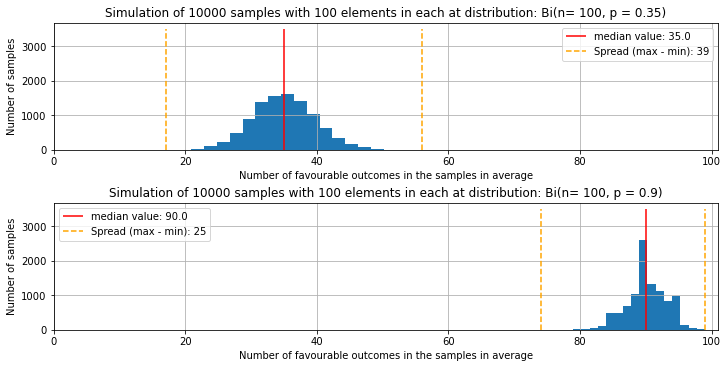

In [9]:
n1 = 100
p1 = 0.35
n2 = 100
p2 = 0.9

dist1 = scipy.stats.binom.rvs(n1, p1, size=10000)
dist2 = scipy.stats.binom.rvs(n2, p2, size=10000)
x = list(range(1,10001))


fig, axs = plt.subplots(2, 1, figsize=(10,5), layout = 'constrained')
axs[0].hist(dist1, bins = 20)
axs[0].set_xlim(left = 0, right = 101)
axs[1].hist(dist2, bins = 20)
axs[1].set_xlim(left = 0, right = 101)

med1 = np.median(dist1)
med2 = np.median(dist2)

axs[0].vlines(med1, ymin=0, ymax=3500, color='red', label=f'median value: {med1}')
axs[1].vlines(med2, ymin=0, ymax=3500, color='red', label=f'median value: {med2}')
axs[0].vlines(dist1.min(), ymin=0, ymax=3500, color='orange', linestyles = 'dashed', label = f'Spread (max - min): {dist1.max() - dist1.min()}')
axs[0].vlines(dist1.max(), ymin=0, ymax=3500, color='orange', linestyles = 'dashed')
axs[1].vlines(dist2.min(), ymin=0, ymax=3500, color='orange', linestyles = 'dashed', label = f'Spread (max - min): {dist2.max() - dist2.min()}')
axs[1].vlines(dist2.max(), ymin=0, ymax=3500, color='orange', linestyles = 'dashed')
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel('Number of favourable outcomes in the samples in average')
axs[1].set_xlabel('Number of favourable outcomes in the samples in average')
axs[0].set_ylabel('Number of samples')
axs[1].set_ylabel('Number of samples')
axs[0].set_title('Simulation of 10000 samples with 100 elements in each at distribution: Bi(n= 100, p = 0.35)')
axs[1].set_title('Simulation of 10000 samples with 100 elements in each at distribution: Bi(n= 100, p = 0.9)')
axs[0].legend()
axs[1].legend()

The first plot bin(n= 100, p = 0.35) has a "wider" distribution / spread, than the second plot.

The median values also differ and are where the expected value is for the two distributions.

### Theoretical expected value and variance of our samples

In [28]:
exp_value1 =  n1*p1
exp_value2 =  n2*p2
theo_var1 = exp_value1*(1-p1)
theo_var2 = exp_value2*(1-p2)

print(f'First distribution:\n E(X): {exp_value1} \n Var: {theo_var1}', end='\n\n')
print(f'Second distribution:\n E(X): {exp_value2} \n Var: {round(theo_var2, 3)}')

First distribution:
E(X): 35.0 
Var: 22.75

Second distribution:
E(X): 90.0 
Var: 9.0


### True expected value and variance of our samples

In [32]:
mean1 = np.mean(dist1)
var1 = np.var(dist1)
mean2 = np.mean(dist2)
var2 = np.var(dist2)

print(f'Distribution 1:\n Mean: {mean1}\n Variance: {var1}', end='\n\n')
print(f'Distribution 2:\n Mean: {mean2}\n Variance: {var2}')

Distribution 1:
 Mean: 34.9944
 Variance: 22.14276864

Distribution 2:
 Mean: 90.0198
 Variance: 8.89240796


In [5]:
comparison = pd.DataFrame(np.array([[exp_value1, exp_value2, theo_var1, theo_var2], [mean1, mean2, var1, var2]]), columns=['$E(X_1)$','$E(X_2)$', '$Var_1$', '$Var_2$'], index=['Theoretical','Real'])
comparison

,$E(X_1)$,$E(X_2)$,$Var_1$,$Var_2$
Theoretical,35.0000,90.0000,22.750000,9.000000
Real,34.9624,89.9789,23.396186,9.109655


There is a slight difference between both in the theoretical and real expected values and theoretical and real variances, but this difference is quite small.

The real expected values are very close to the theoretical expected values. This is thanks to the Law of large numbers, as we take 10000 times a sample of 100 elements: the more samples we have the more our samples expected (real) value will converge to the populations expected (theoretical) value.

As for the variance, for both plots, the real and theoretical variance are close to eachother (see above explanation).